<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/MSDS_451_A1_Exploratory_Data_Analysis_(EDA)_of_US_stocks%E2%80%99_price_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSDS451 - Assignment 1

In [ ]:
import pandas as pd
import bz2
import os
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd


import seaborn as sns
sns.set()
import datetime as dt



In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-451/W1"

total 211327
-rw------- 1 root root    264756 Jan 14 23:48 'MSDS 451-A1-Exploratory Data Analysis (EDA) of US stocks’ price data.ipynb'
-rw------- 1 root root 216132826 Jan 12 04:03  R3K_Daily


In [ ]:
w1_files = "/content/drive/My Drive/Colab_Notebooks/MSDS-451/W1"

In [ ]:
df = pd.read_pickle(w1_files+"/R3K_Daily")
df.shape
df.head()


(3894844, 8)

,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol
0,2000-12-01,33.287973,34.388402,33.170070,33.327274,53.0000,36286,A
1,2000-12-04,32.737759,33.366575,31.755233,32.069641,51.0000,28951,A
2,2000-12-05,33.170070,35.017219,33.052167,34.624208,55.0625,54723,A
3,2000-12-06,34.742111,35.803239,32.698458,32.698458,52.0000,43669,A
4,2000-12-07,33.012866,34.506305,32.305447,33.956091,54.0000,30599,A


## Question 2

In [ ]:
df[df['Symbol'].str.contains('.', regex=False, na=True)]



,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol
462782,2000-12-01,3.330639,3.340311,3.330639,3.340311,64.7500,25,BF.A
462783,2000-12-04,3.347700,3.422238,3.347700,3.422238,66.0000,829,BF.A
462784,2000-12-05,3.415756,3.487053,3.415756,3.435201,66.2500,741,BF.A
462785,2000-12-06,3.448164,3.512979,3.441682,3.451404,66.5625,1004,BF.A
462786,2000-12-07,3.451404,3.564831,3.451404,3.525942,68.0000,854,BF.A
...,...,...,...,...,...,...,...,...
2311818,2019-03-04,94.470000,94.500000,91.420000,91.580000,91.5800,2042,MOG.A
2311819,2019-03-05,91.600000,92.370000,91.280000,91.360000,91.3600,1604,MOG.A
2311820,2019-03-06,91.180000,91.680000,89.770000,89.850000,89.8500,1522,MOG.A
2311821,2019-03-07,89.960000,89.960000,88.340000,88.530000,88.5300,1462,MOG.A


In [ ]:
# return the dtype of each column
result = df.dtypes
  
# Print the result
print(result)

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
UnAdjustedClose           float64
Volume                     object
Symbol                     object
dtype: object


In [ ]:
dual_df = df[df['Symbol'].str.contains('.', regex=False, na=True)]
dual_df['Symbol'].unique()

array(['BF.A', 'BF.B', 'BRK.B', 'CRD.B', "FCE.A'", 'HEI.A', 'JW.A',
       'LEN.B', 'MOG.A'], dtype=object)

## Question 3

In [ ]:
#3 a
minvalues = df.min()
  
minvalues

df2 = df[df['Close'] <= 0.009]
df2

Date               2000-12-01 00:00:00
Open                          0.008893
High                          0.008893
Low                           0.008893
Close                         0.008893
UnAdjustedClose                  0.003
Volume                               0
Symbol                               A
dtype: object

,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol
3707037,2004-10-25,0.008893,0.008893,0.008893,0.008893,0.01,11,WETF


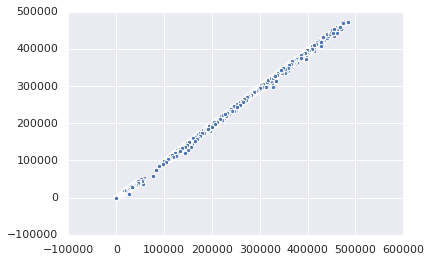

In [ ]:
x = df['High']
y = df['Close']
plt.scatter(x, y) 
plt.show()

## Question 4

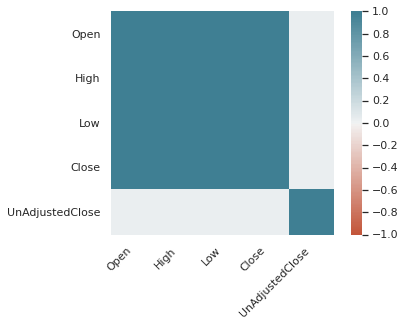

In [ ]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
df_ques5 = df[df['Symbol'].isin (['KORS','CPRI'])]

#df_ques5.reset_index(inplace = True,drop = True)


## Question 5

Symbol
CPRI    AxesSubplot(0.125,0.2;0.775x0.7)
KORS    AxesSubplot(0.125,0.2;0.775x0.7)
Name: Open, dtype: object

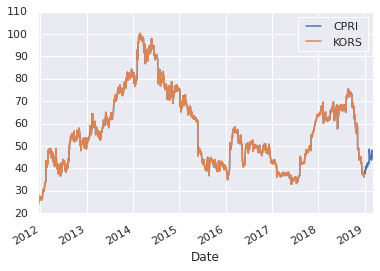

In [ ]:
df_ques5.set_index('Date', inplace=True)
df_ques5.groupby('Symbol')['Open'].plot(legend=True)


Symbol
CPRI    AxesSubplot(0.125,0.2;0.775x0.7)
KORS    AxesSubplot(0.125,0.2;0.775x0.7)
Name: Close, dtype: object

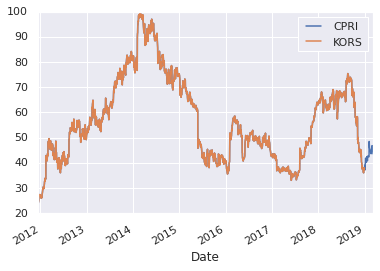

In [ ]:
df_ques5.groupby('Symbol')['Close'].plot(legend=True)

## Question 6

Symbol
GOOG     AxesSubplot(0.125,0.2;0.775x0.7)
GOOGL    AxesSubplot(0.125,0.2;0.775x0.7)
Name: Open, dtype: object

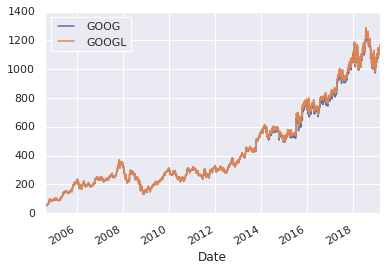

In [ ]:
df_ques6 = df[df['Symbol'].isin (['GOOG','GOOGL'])]

df_ques6.set_index('Date', inplace=True)
df_ques6.groupby('Symbol')['Open'].plot(legend=True)

## Question 7

Symbol
GOV    AxesSubplot(0.125,0.2;0.775x0.7)
OPI    AxesSubplot(0.125,0.2;0.775x0.7)
Name: Open, dtype: object

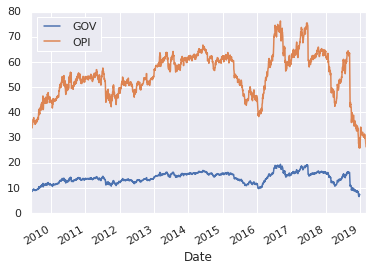

In [ ]:
df_ques7 = df[df['Symbol'].isin (['GOV','OPI'])]

df_ques7.set_index('Date', inplace=True)
df_ques7.groupby('Symbol')['Open'].plot(legend=True)

## Question 7a

Symbol
GOV    AxesSubplot(0.125,0.2;0.775x0.7)
OPI    AxesSubplot(0.125,0.2;0.775x0.7)
Name: Open, dtype: object

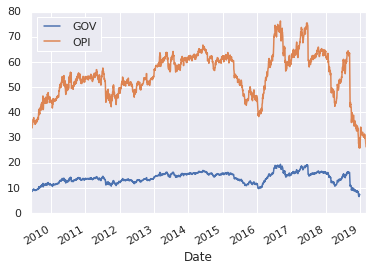

In [ ]:
df_ques7a = df[df['Symbol'].isin (['GOV','OPI', "SIR"])]

df_ques7a.set_index('Date', inplace=True)
df_ques7a.groupby('Symbol')['Open'].plot(legend=True)

## Question 8

Symbol
BF.A    AxesSubplot(0.125,0.2;0.775x0.7)
BF.B    AxesSubplot(0.125,0.2;0.775x0.7)
Name: Open, dtype: object

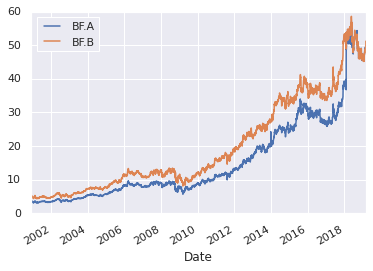

In [ ]:
df_ques8 = df[df['Symbol'].isin (['BF.A','BF.B'])]

df_ques8.set_index('Date', inplace=True)
df_ques8.groupby('Symbol')['Open'].plot(legend=True)

In [ ]:
df = pd.read_pickle(w1_files+"/R3K_Daily")
df.shape
df.head()

from scipy import stats
import pandas as pd
import numpy as np
from datetime import datetime




(3894844, 8)

,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol
0,2000-12-01,33.287973,34.388402,33.170070,33.327274,53.0000,36286,A
1,2000-12-04,32.737759,33.366575,31.755233,32.069641,51.0000,28951,A
2,2000-12-05,33.170070,35.017219,33.052167,34.624208,55.0625,54723,A
3,2000-12-06,34.742111,35.803239,32.698458,32.698458,52.0000,43669,A
4,2000-12-07,33.012866,34.506305,32.305447,33.956091,54.0000,30599,A


## Question 9

In [ ]:

# Add a column to indicate whether a stock is currently in the database
df['in_database'] = 1

# Create a list of stock symbols that have been removed from the database
removed_symbols = ['AAPL', 'GOOG', 'FB', 'AMZN', 'MSFT', 'KORS']
removed_df = df[df['Symbol'].isin(removed_symbols)]
removed_df['in_database'] = 0
removed_df.head()

# Remove the stocks from the dataframe
df1 = df[~df['Symbol'].isin(removed_symbols)]
df1.head()
# Create a new dataframe with all stocks
all_df = pd.concat([df1, removed_df], ignore_index=True)

# Group the dataframe by whether the stock is in the database or not
grouped_df = all_df.groupby('in_database')

# Calculate the mean performance for each group
means = grouped_df['UnAdjustedClose'].mean()

# Check if there is a significant difference in mean performance between the two groups
t, p = stats.ttest_ind(grouped_df.get_group(1)['UnAdjustedClose'], grouped_df.get_group(0)['UnAdjustedClose'])

if p < 0.05 and means[0] > means[1]:
    print("Survivorship bias detected")
else:
    print("No survivorship bias detected")

<ipython-input-82-94c6ede730f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_df['in_database'] = 0


,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol,in_database
227010,2000-12-01,24.9375,26.7500,23.000,24.6250,24.6250,77574,AMZN,0
227011,2000-12-04,25.1875,27.1875,23.250,26.5625,26.5625,82555,AMZN,0
227012,2000-12-05,27.1250,27.6250,24.750,25.3750,25.3750,99699,AMZN,0
227013,2000-12-06,24.6875,26.0000,23.625,23.6250,23.6250,88258,AMZN,0
227014,2000-12-07,23.0625,23.4375,20.125,21.3750,21.3750,106475,AMZN,0


,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol,in_database
0,2000-12-01,33.287973,34.388402,33.170070,33.327274,53.0000,36286,A,1
1,2000-12-04,32.737759,33.366575,31.755233,32.069641,51.0000,28951,A,1
2,2000-12-05,33.170070,35.017219,33.052167,34.624208,55.0625,54723,A,1
3,2000-12-06,34.742111,35.803239,32.698458,32.698458,52.0000,43669,A,1
4,2000-12-07,33.012866,34.506305,32.305447,33.956091,54.0000,30599,A,1


Survivorship bias detected


In [ ]:
df.sort_values(by="Volume", ascending=False).head()

,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol,in_database
1492479,2009-03-04,5.091154,5.098186,4.127773,4.704395,6.69,7830206,GE,1
3187341,2010-04-07,0.847478,0.924521,0.837847,0.914891,0.95,6098345,SIRI,1
3186001,2004-12-08,7.588779,7.800649,6.336823,6.644997,6.90,5804534,SIRI,1
2980425,2009-05-21,3.405841,3.602168,3.329017,3.499736,4.10,5709817,RF,1
896605,2011-02-10,15.635041,15.674824,14.950759,15.054197,18.92,5600402,CSCO,1


In [ ]:
df9 = df.drop(['Date','in_database'], axis = 1)
#df9.sort_values(by="Symbol", ascending=False).head()
df9a = df9.groupby('Symbol', as_index=False).mean().head()

In [ ]:
df9a.head()
df9adup = df9a[df9a.duplicated()]
df9adup.head()

,Symbol,Open,High,Low,Close,UnAdjustedClose
0,A,29.044509,29.389103,28.709057,29.059044,38.014613
1,AAC,16.025328,16.475914,15.556048,15.995296,15.995296
2,AAL,26.110706,26.580832,25.615495,26.090347,26.968044
3,AAMC,229.442214,235.694091,223.462559,230.067779,230.067779
4,AAN,20.354733,20.583942,20.131470,20.362000,25.677995


,Symbol,Open,High,Low,Close,UnAdjustedClose
